In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [15]:
ds = pd.read_csv(r"C:\Users\Tech Pool\Downloads\desti\Mall_Customers.csv")
ds.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x = ds[['Annual Income (k$)','Spending Score (1-100)']]

In [5]:
ss = StandardScaler()

In [6]:
x_scaled = ss.fit_transform(x)

# KMeans Clustering

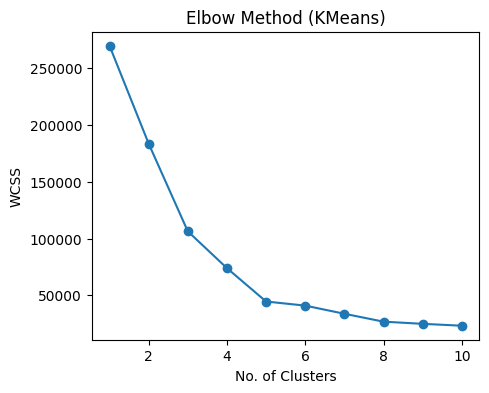

In [13]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(5,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method (KMeans)')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=5,random_state=42)

In [26]:
ds['Kmeans_clusters'] = kmeans.fit_predict(x)

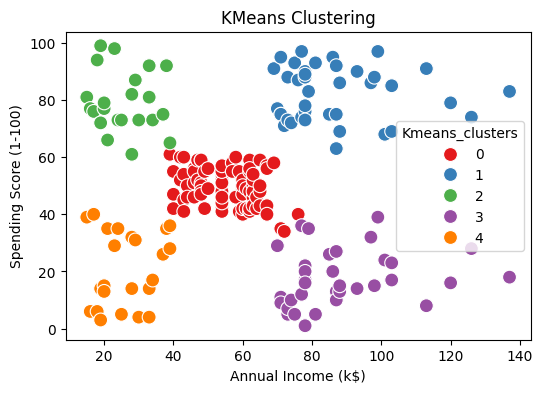

In [30]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Kmeans_clusters', data=ds, palette='Set1', s=100)
plt.title('KMeans Clustering')
plt.show()

# Herarchical Clustering

In [37]:
linked = linkage(x_scaled,method='ward')

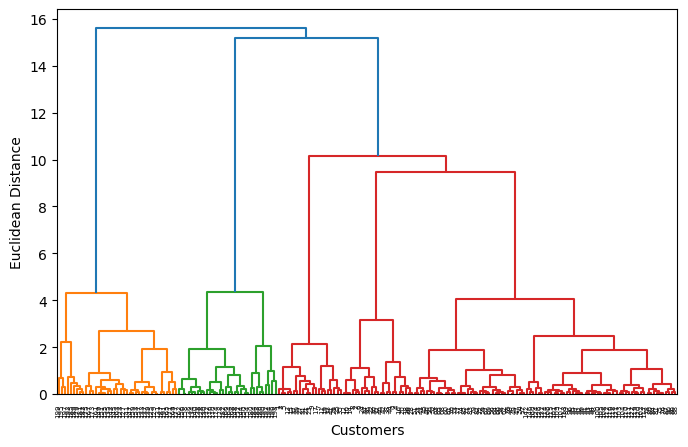

In [39]:
plt.figure(figsize=(8,5))
dendrogram(linked)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [41]:
ds['Herarchical_Cluster'] = fcluster(linked,5,criterion='maxclust') - 1

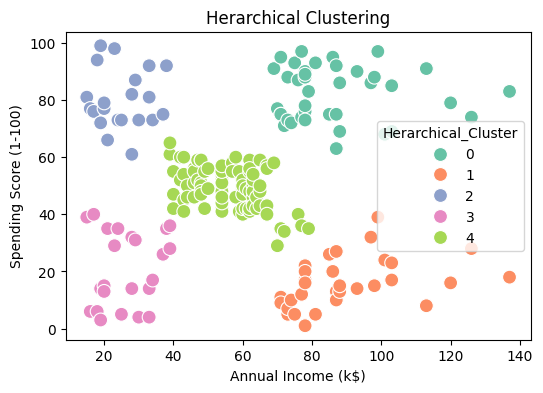

In [45]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Herarchical_Cluster', data=ds, palette='Set2', s=100)
plt.title('Herarchical Clustering')
plt.show()

# DBSCAN

In [31]:
dbscan = DBSCAN(eps=0.5,min_samples=5)

In [33]:
ds['DBSCAN'] = dbscan.fit_predict(x_scaled)

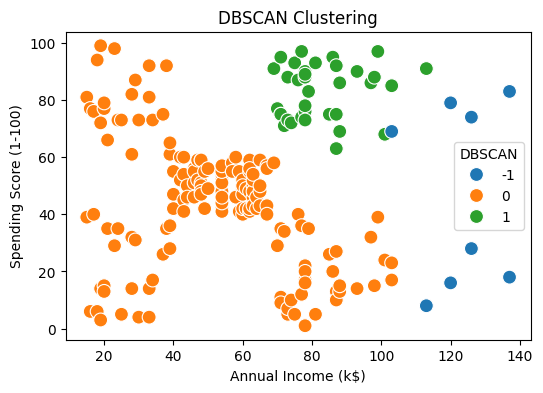

In [35]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN', data=ds, palette='tab10', s=100)
plt.title('DBSCAN Clustering')
plt.show()